# House Price Prediction using Linear Regression

### **Introduction:**

In this project, we are tasked with analyzing a dataset that contains housing-related information for a fictional town. The dataset consists of various numerical features such as average income, house age, number of rooms, and population, along with the corresponding house prices. Additionally, there is a categorical feature representing the addresses of the houses.

### **Problem Statement:**

The goal is to develop a predictive model using Linear Regression that can accurately estimate house prices based on the given features. This involves several key steps in data preprocessing, model selection, and evaluation:

1. **Data Preprocessing**:
   - Handling categorical data: Convert the categorical 'Address' feature into a numerical format suitable for machine learning models.
   - Feature scaling: Normalize or standardize numerical features to ensure all features contribute equally to model training.
   - Optional feature engineering: Create new features or transform existing ones to potentially enhance model performance.

2. **Model Selection and Training**:
   - Choose an appropriate regression model: Given the nature of the problem (predicting house prices), linear regression is a common starting point due to its interpretability and ease of implementation.
   - Train the selected model on a training dataset prepared from the preprocessed data.

3. **Model Evaluation**:
   - Evaluate the trained model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and R-squared (R2). These metrics provide insights into how well the model predicts house prices on both training and test datasets.

### **Procedure:**

- **Data Loading**: Load the dataset containing housing information into a pandas DataFrame.
- **Data Engineering**: Preprocess the data by encoding categorical variables, scaling numerical features, and optionally performing feature engineering.
- **Model Training**: Select a linear regression model, split the data into training and testing sets, and train the model using the training set.
- **Model Evaluation**: Evaluate the model's performance using appropriate metrics on the test set to assess its accuracy and generalization capability.

### **Summary:**

In summary, this project involves preparing and analyzing a housing dataset, building a predictive model using linear regression, and evaluating its performance. By following a systematic approach to data preprocessing, model selection, and evaluation, we aim to develop a robust model that accurately predicts house prices based on the provided features.

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Applying style settings for seaborn and matplotlib
sns.set_theme(style="whitegrid")
plt.style.use("ggplot")


In [158]:
df = pd.read_csv('/content/USA_Housing.csv')
# Displaying data
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [159]:
#Displaying information about like dat type, Not- Null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [160]:
#Summarize the distribution and central tendencies
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [161]:
#Displaying columns
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#  Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!

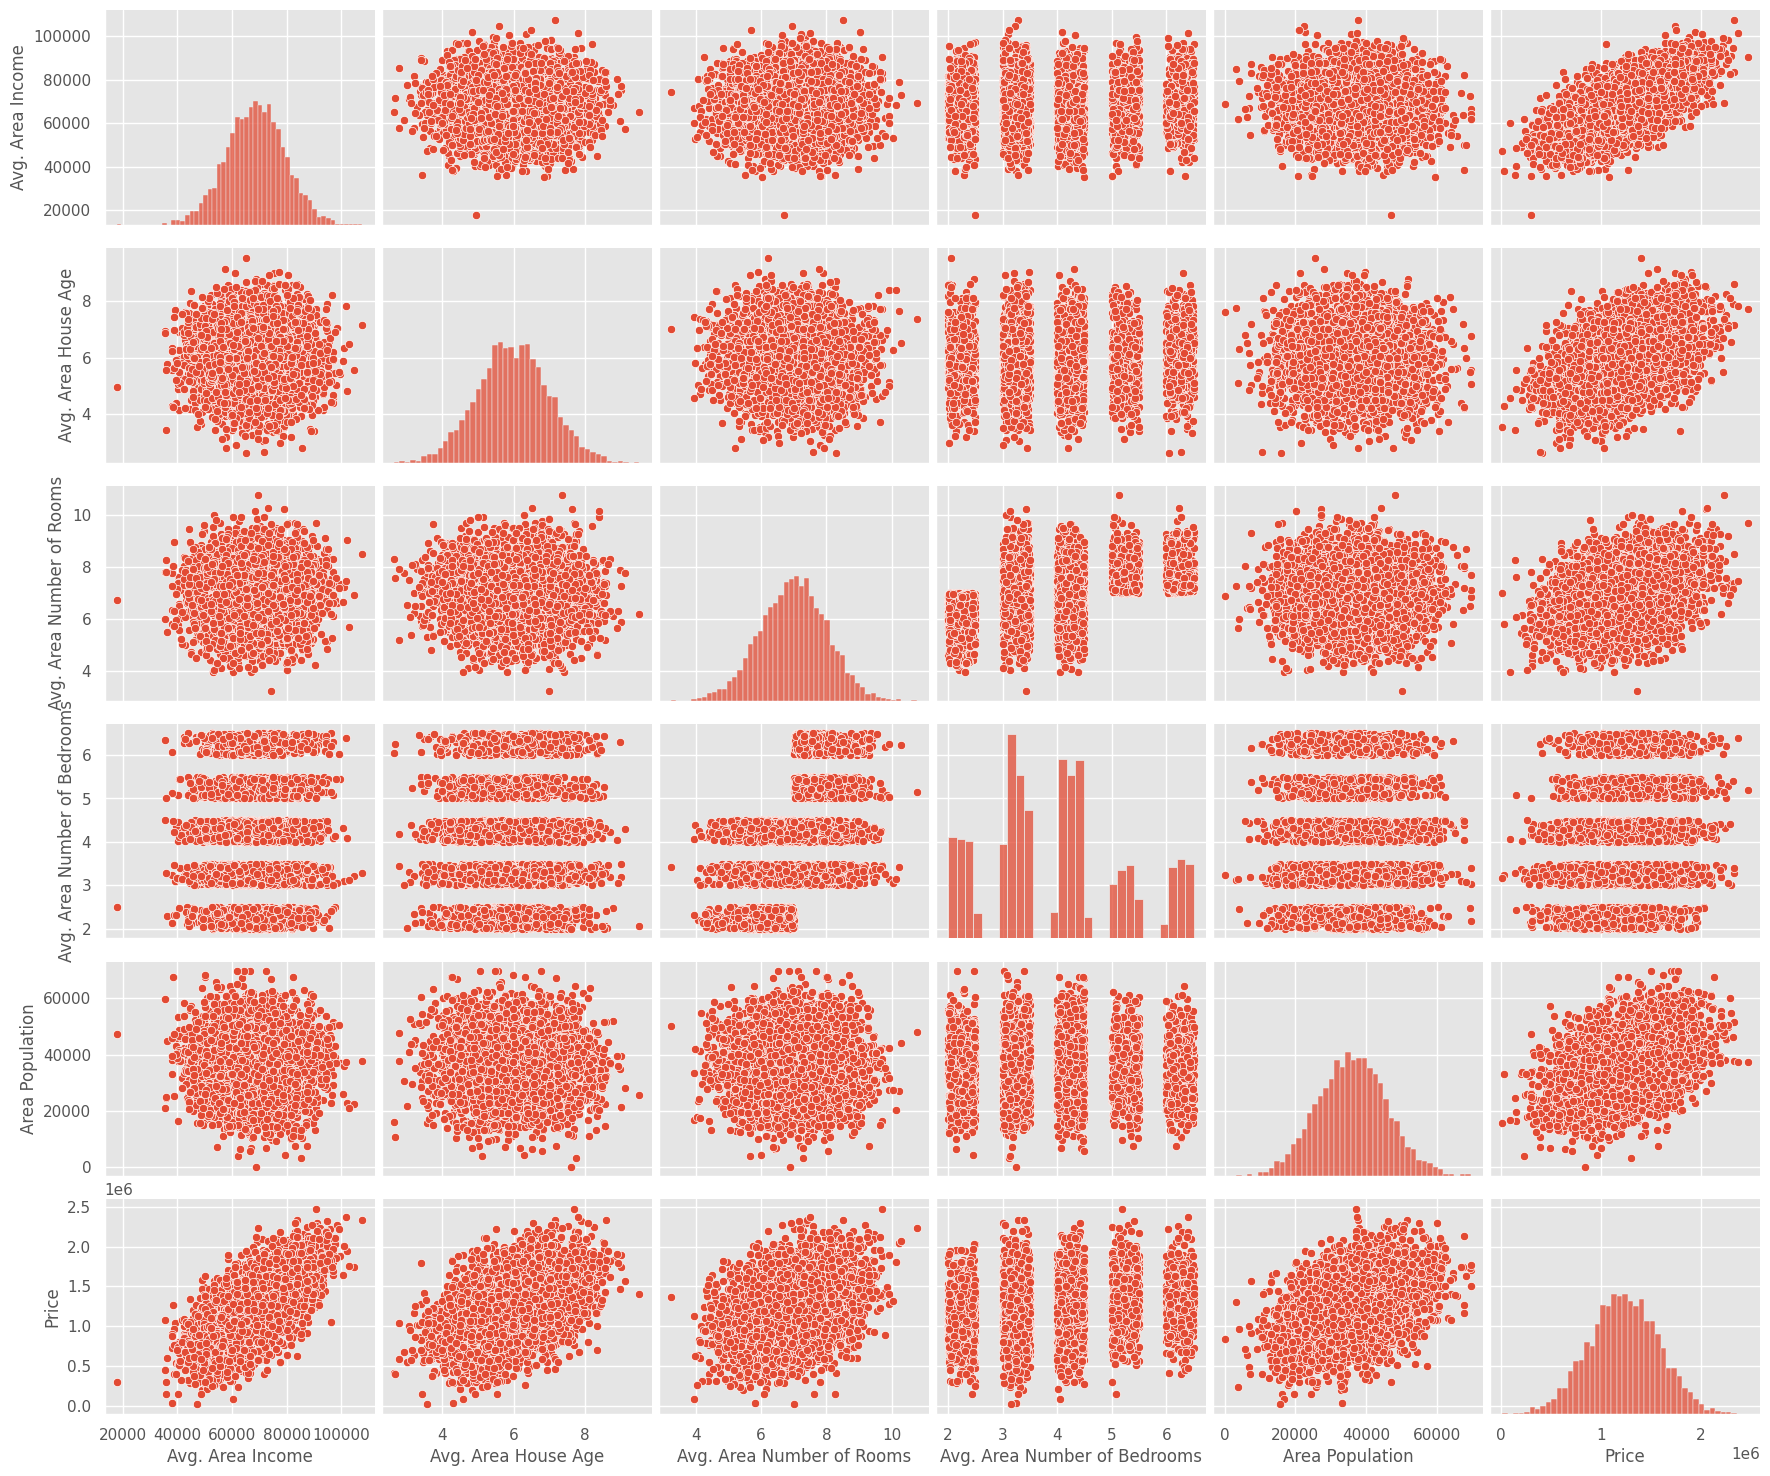

In [162]:
# Plotting pairplot
sns.pairplot(df, height=2.5, aspect=1.2)



<Axes: xlabel='Price', ylabel='Count'>

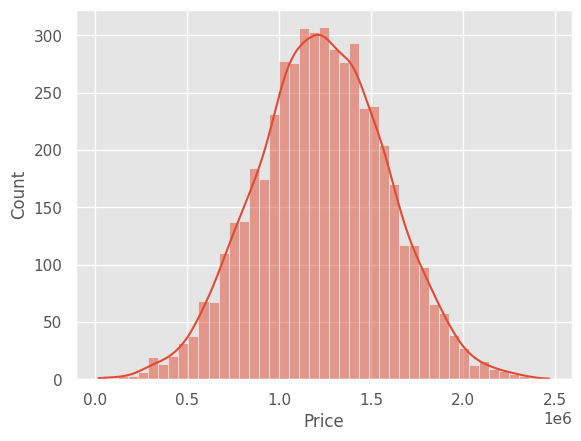

In [163]:
sns.histplot(df['Price'], kde=True)

<Axes: >

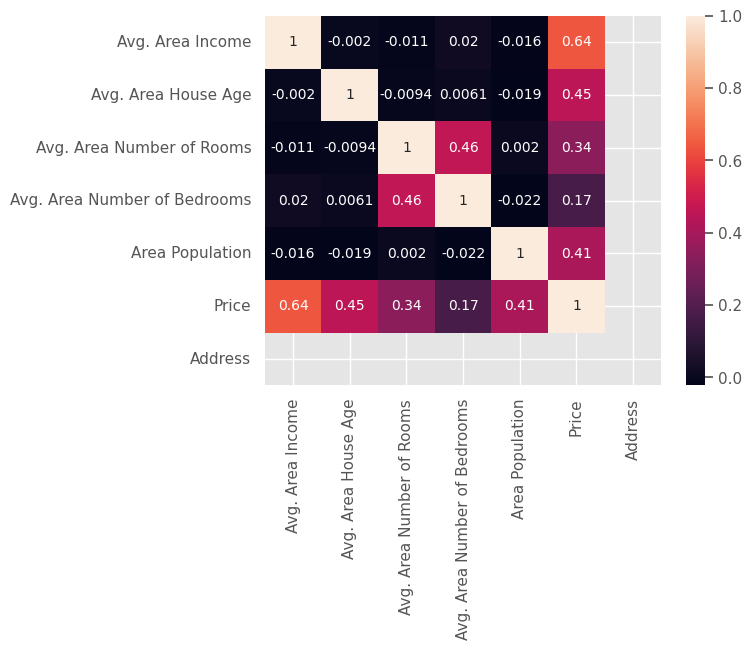

In [164]:

# Convert relevant columns to numeric, handling errors
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replacing non-convertible values with NaN
        except:
            pass  # Skip columns that cannot be converted

sns.heatmap(df.corr(), annot=True)

In [165]:
#Displaying the data after converstion
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NaN
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,NaN
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,NaN
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,NaN
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,NaN


# Training a Linear Regression Model

> Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable,


In [166]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

##**Train Test Split**
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define a function to calculate MAPE (Mean Absolute Percentage Error)
def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

# Function to print and return evaluation metrics
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mape = mape_score(true, predicted)
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAPE:', mape)
    print('R2 Square:', r2_square)
    print('__________________________________')
    return mae, mse, rmse, mape, r2_square

# Function to perform cross-validation and return mean score
def cross_val(model, X, y, cv=10):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    return np.sqrt(-scores.mean())

#  Preparing Data For Linear Regression
>
>

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])
# use piplines to scale data (Whenever our data is not normally distributed, we use it to get normal distribution. You must have tried using distplots and found tha the data is right or left skewed. So it helps dealing with that.)
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [170]:
#
X_train

array([[-0.19049241, -0.12817719, -0.13160635,  0.12038585, -0.82761782],
       [-1.38876401,  0.43080443,  0.80028487, -0.55648895,  1.15829878],
       [-0.35012392,  0.46680752,  1.70375078,  0.03067955, -0.31904298],
       ...,
       [-0.22335061,  0.53809182, -0.36489661, -0.68697084,  0.11908894],
       [-0.92417067,  1.43077434,  2.26846315,  0.2753331 ,  1.39018355],
       [-0.69357335, -0.07762332,  0.89219611,  1.67801341, -0.00681852]])

In [171]:
X_test

array([[-0.62396497,  1.05134233, -0.53493732, -0.59726454,  0.77509854],
       [-1.06752524,  0.92593776, -0.05804915, -0.69512596,  0.73880748],
       [ 0.14995479,  0.77674776, -0.31465336, -1.60849918, -0.69076777],
       ...,
       [ 1.16115701,  1.18417775,  0.25662849,  1.18870632,  0.93991305],
       [ 1.69832503,  0.56046124, -1.85607396, -1.54325824,  1.16585758],
       [-0.14145775, -1.04516314,  0.64633545,  0.8625016 , -0.40292631]])

##**Linear Regression**

In [172]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

##  Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [173]:
# print the intercept
print(lin_reg.intercept_)

1229576.9925600903


In [174]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,231741.876652
Avg. Area House Age,163580.776566
Avg. Area Number of Rooms,120724.771387
Avg. Area Number of Bedrooms,2992.449135
Area Population,152235.900097


##  Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [175]:
pred = lin_reg.predict(X_test)

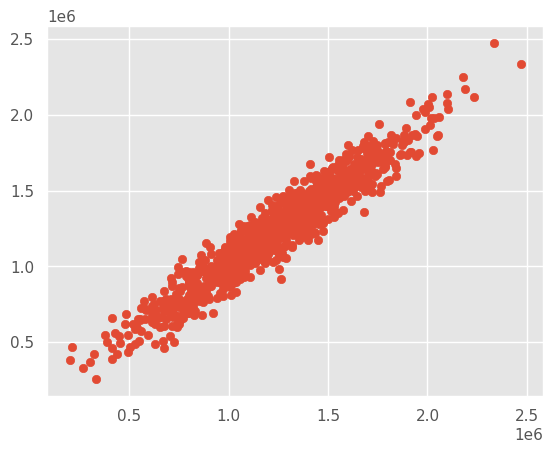

In [176]:
plt.scatter(y_test, pred)

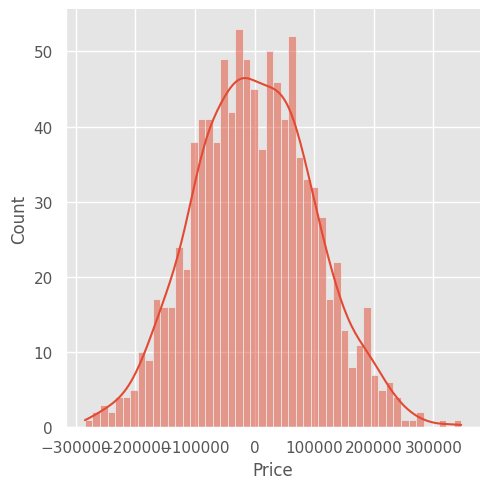

In [177]:
sns.displot((y_test - pred), bins=50, kde=True)  # Replace with your data and parameters
plt.show()  # Display the plot

In [178]:
#Displaying Evaluation of Model
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 80879.09723489445
MSE: 10089009300.89399
RMSE: 100444.06055558482
MAPE: 7.387838859754366
R2 Square: 0.9179971706834331
__________________________________
Train set evaluation:
_____________________________________
MAE: 81509.3933124445
MSE: 10256318867.482723
RMSE: 101273.48551068401
MAPE: 7.682929604751326
R2 Square: 0.9179787435623722
__________________________________


(81509.3933124445,
 10256318867.482723,
 101273.48551068401,
 7.682929604751326,
 0.9179787435623722)

In [179]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred), cross_val(LinearRegression(), X_train, y_train)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square', 'Cross Validation'])

# Display the results_df
results_df


MAE: 80879.09723489445
MSE: 10089009300.89399
RMSE: 100444.06055558482
MAPE: 7.387838859754366
R2 Square: 0.9179971706834331
__________________________________


,Model,MAE,MSE,RMSE,MAPE,R2 Square,Cross Validation
0,Linear Regression,80879.097235,1.008901e+10,100444.060556,7.387839,0.917997,101493.892066


## **Conclusion**
The model appears to generalize well from training to unseen test data, as indicated by consistent performance in both sets.
The R2 score of approximately 0.918 suggests that the model explains about 91.8% of the variance in the target variable, which is quite good.